In [ ]:
!pip install cohere

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 72.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 76.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 22.8 MB/s eta 0:00:00


In [ ]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.6 MB/s eta 0:00:00


In [ ]:
import cohere

co = cohere.Client('xdmxTYztxPyl4D43kjzWIM2UBbjvmkuWQ93dgyCt')
response = co.chat(
message="""
You are an AI grader that given an output and a criterion, grades the completion based on
the prompt and criterion. Below is a prompt, a completion, and a criterion with which to grade
the completion. You need to respond according to the criterion instructions. Remember to be critical as
this is important for our business context.

## Output
I think the customer's UltraBook X15 displayed a black screen, likely due to a graphics driver issue.
Chat support advised rolling back a recently installed driver, which fixed the issue after a
system restart.

## Criterion
Rate the ouput text with a score between 0 and 1. 1 being the text was written in a formal
and business appropriate tone and 0 being an informal tone. Respond only with the score.
""",
)
print(response)

text='1.0' generation_id='e4f9df08-4d4f-47c0-b4c5-88eacaf5d394' citations=None documents=None is_search_required=None search_queries=None search_results=None finish_reason='COMPLETE' tool_calls=None chat_history=[ChatMessage(role='USER', message="\nYou are an AI grader that given an output and a criterion, grades the completion based on\nthe prompt and criterion. Below is a prompt, a completion, and a criterion with which to grade\nthe completion. You need to respond according to the criterion instructions. Remember to be critical as\nthis is important for our business context.\n\n## Output\nI think the customer's UltraBook X15 displayed a black screen, likely due to a graphics driver issue.\nChat support advised rolling back a recently installed driver, which fixed the issue after a\nsystem restart.\n\n## Criterion \nRate the ouput text with a score between 0 and 1. 1 being the text was written in a formal\nand business appropriate tone and 0 being an informal tone. Respond only with 

In [ ]:
response.text

'0.8'

In [ ]:
import pandas as pd
import os
import cohere
co = cohere.Client(<YOUR API KEY HERE>)

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import time

In [ ]:
df = pd.read_csv("IBM/2018.csv")

In [ ]:
os.listdir("IBM")

['2018.csv', '2019.csv', '2020.csv', '2021.csv', '2022.csv', '2023.csv']

In [ ]:
df.head()

,section,element_type,text
0,BUSINESS,NarrativeText,International Business Machines Corporation (I...
1,BUSINESS,NarrativeText,IBM's strategy is wholly focused on the needs ...
2,BUSINESS,NarrativeText,One\nof the biggest priorities for IBM clients...
3,BUSINESS,NarrativeText,"However,\nmost companies are harnessing only a..."
4,BUSINESS,NarrativeText,IBM\nhelps clients harness the power of their ...


In [ ]:
df.section.value_counts()

section
FORM_SUMMARY                  4809
MANAGEMENT_DISCUSSION         4647
BUSINESS                        89
EXHIBITS                        88
RISK_FACTORS                    33
MINE_SAFETY                      4
PROPERTIES                       3
CONTROLS_AND_PROCEDURES          2
MANAGEMENT                       2
COMPENSATION                     2
LEGAL_PROCEEDINGS                1
MARKET_RISK_DISCLOSURES          1
FINANCIAL_STATEMENTS             1
RELATED_PARTY_TRANSACTIONS       1
ACCOUNTING_FEES                  1
Name: count, dtype: int64

In [ ]:
grouped_df = df[["section","text"]].groupby('section')['text'].agg(lambda x: ' '.join(x)).reset_index()

In [ ]:
(grouped_df.section, grouped_df.text.str.len())

(0                ACCOUNTING_FEES
 1                       BUSINESS
 2                   COMPENSATION
 3        CONTROLS_AND_PROCEDURES
 4                       EXHIBITS
 5           FINANCIAL_STATEMENTS
 6                   FORM_SUMMARY
 7              LEGAL_PROCEEDINGS
 8                     MANAGEMENT
 9          MANAGEMENT_DISCUSSION
 10       MARKET_RISK_DISCLOSURES
 11                   MINE_SAFETY
 12                    PROPERTIES
 13    RELATED_PARTY_TRANSACTIONS
 14                  RISK_FACTORS
 Name: section, dtype: object,
 0         366
 1       38777
 2        1660
 3         924
 4       17957
 5         196
 6     2784387
 7         157
 8         134
 9     2698656
 10        148
 11       1151
 12        979
 13        409
 14      30263
 Name: text, dtype: int64)

In [ ]:
grouped_df[grouped_df["section"] == "FINANCIAL_STATEMENTS"].text

4    We have audited the accompanying consolidated ...
Name: text, dtype: object

In [ ]:
strict_phrase = "You must be strict and critically evaluate the text as it has important business consequences."

response = co.chat(
message=f"""
You are an AI grader that given an output and a criterion, grades the completion based on
the prompt and criterion. Below is a prompt, a completion, and a criterion with which to grade
the completion. You need to respond according to the criterion instructions.

## Output
{' '.join(grouped_df['text'])}

## Criterion
You should give the text a decimal numeric grade between 0 and 2.
2. The text is confident about robust growth and of greater returns next financial year.
1. Text in this category gives strong likelihood of company stability, but is either relatively
unsure about future growth or not confident about it.
0. Text in this category shows that the company is not very robust, uncertain about its future and most
importantly, shows inconsistant and bad finances.
Answer only with a decimal number in the 0-2 range
""",

temperature=0.5
)
print(response)

text='2.0' generation_id='60eaba69-7848-4f04-b170-fa68d9be3ba6' citations=None documents=None is_search_required=None search_queries=None search_results=None finish_reason='COMPLETE' tool_calls=None chat_history=[ChatMessage(role='USER', message='\nYou are an AI grader that given an output and a criterion, grades the completion based on\nthe prompt and criterion. Below is a prompt, a completion, and a criterion with which to grade\nthe completion. You need to respond according to the criterion instructions.\n\n## Output\nWe acquire and manage precious metal streams, royalties, and similar interests. We seek to acquire existing stream and royalty interests or to finance projects that are in production or in the development stage in exchange for stream or royalty interests. Please refer to Item 2, Properties, for a discussion of the development at our principal properties. We manage our business under two segments: Acquisition and Management of Stream Interests—A metal stream is a purcha

In [ ]:
print(grouped_df[grouped_df["section"] == "FINANCIAL_STATEMENTS"].text)

3    Consolidated Statements of Operations for the ...
Name: text, dtype: object


In [ ]:
grouped_df[grouped_df["section"] == "FINANCIAL_STATEMENTS"].text

3    Consolidated Statements of Operations for the ...
Name: text, dtype: object

In [ ]:
grouped_df.to_csv("test.csv")

In [ ]:
grouped_df

,section,text
0,BUSINESS,The Company has historically experienced highe...
1,COMPENSATION,The information required by this Item is set f...
2,CONTROLS_AND_PROCEDURES,Based on an evaluation under the supervision a...
3,FINANCIAL_STATEMENTS,Consolidated Statements of Operations for the ...
4,LEGAL_PROCEEDINGS,The Company is subject to legal proceedings an...
5,MANAGEMENT,The following discussion should be read in con...
6,MANAGEMENT_DISCUSSION,The following discussion should be read in con...
7,MARKET_RISK_DISCLOSURES,The Company regularly reviews its foreign exch...
8,PRINCIPAL_STOCKHOLDERS,The information required by this Item is set f...
9,PROPERTIES,The Company’s headquarters are located in Cupe...


In [ ]:
def get_confidence_rating(textual, phrase=" "):
    response = co.chat(
    message=f"""
    You are an AI grader that given an output and a criterion, grades the completion based on
    the prompt and criterion. Below is a prompt, a completion, and a criterion with which to grade
    the completion. You need to respond according to the criterion instructions. {phrase}

    ## Output
    {textual}

    ## Criterion
    You should give the text a decimal numeric grade between 0 and 2.
    2. The text is confident about robust growth and of greater returns next financial year.
    1. Text in this category gives strong likelihood of company stability, but is either relatively
    unsure about future growth or not confident about it.
    0. Text in this category shows that the company is not very robust, uncertain about its future and most
    importantly, shows inconsistant and bad finances.
    Answer only with a decimal number in the 0-2 range
    """,
    temperature=0.5
    )
    print(response)
    return response.text

In [ ]:
def get_environment_rating(textual, year, phrase=" "):
    response = co.chat(
    message=f"""
    You are an AI grader that given an output and a criterion, grades the completion based on
    the prompt and criterion. Below is a prompt, a completion, and a criterion with which to grade
    the completion. You need to respond according to the criterion instructions. For reference, these are
    documents from the year {year}. {phrase}

    ## Output
    {textual}

    ## Criterion
    You should give the text a decimal numeric grade between 0 and 2.
    2. The text is offers actionable plans relating to environment and sustainability, and includes
    sustainability as a central goal.
    1. Text in this category mentions commitments to sustainability and environment, but doesn't offer many
    actionable plans for the same.
    0. Text in this category doesn't mention the environment and sustainability of the environment at all.
    Answer only with a decimal number in the 0-2 range
    """,
    temperature=0.5
    )
    print(response)
    return response.text

In [ ]:
def get_innovation_rating(textual, year, phrase=" "):
    response = co.chat(
    message=f"""
    You are an AI grader that given an output and a criterion, grades the completion based on
    the prompt and criterion. Below is a prompt, a completion, and a criterion with which to grade
    the completion. You need to respond according to the criterion instructions. For reference, these are
    documents from the year {year}. {phrase}

    ## Output
    {textual}

    ## Criterion
    You should give the text a decimal numeric grade between 0 and 2.
    2. The text shows future plans as well as actions that the company has taken towards greater innovation in
    its operations. It also mentions a working R&D unit.
    1. Text mentions commitment to improve its practises and operations, and mentions innovation. However, there is
    little to no work work done for the same in this current document.
    0. Text emphasizes continuing its operations next year in the same manner, without any new innovations.
    Answer only with a decimal number in the 0-2 range
    """,
    temperature=0.5
    )
    print(response)
    return response.text

In [ ]:
def get_people_rating(textual, year, phrase=" "):
    response = co.chat(
    message=f"""
    You are an AI grader that given an output and a criterion, grades the completion based on
    the prompt and criterion. Below is a prompt, a completion, and a criterion with which to grade
    the completion. You need to respond according to the criterion instructions. For reference, these are
    documents from the year {year}. {phrase}

    ## Output
    {textual}

    ## Criterion
    You should give the text a decimal numeric grade between 0 and 2.
    2. The text acknowledges the importance of people and talent in driving the company forward. It also mentions
    actionable plans to attract new talent and ensure employee welfare.
    1. Text mentions importance of people and talent to its operations but doesn't mention any
    employee welfare activities.
    0. Text makes no mentions of employee welfare and importance of people talent.
    Answer only with a decimal number in the 0-2 range
    """,
    temperature=0.5
    )
    print(response)
    return response.text

In [ ]:
df = pd.read_csv("RGLD/2020.csv")

In [ ]:
master_df = pd.DataFrame(columns=["ticker","year","conf_rating","conf_rating_strict",
                                "env_rating","env_rating_strict","inno_rating","inno_rating_strict",
                                "people_rating", "people_rating_strict"
])

In [ ]:
for ticker in ["RGLD","AAPL","IBM"]:
    #print(os.listdir(f"{ticker}"))
    print(ticker)
    print("+"*50)

    for year in os.listdir(f"{ticker}"):
        df = pd.read_csv(f"{ticker}/{year}")

        if ticker=="IBM" and year=="2018.csv":
            continue

        text_joined = ' '.join(df['text'])
        print(len(text_joined))

        conf_rating = get_confidence_rating(text_joined)
        conf_rating_strict = get_confidence_rating(text_joined, phrase = "You must be very strict and critical while rating because this has critical business impacts")

        env_rating = get_environment_rating(text_joined, year=year[:-4],)
        env_rating_strict = get_environment_rating(text_joined, year=year[:-4], phrase = "You must be very strict and critical while rating because this has critical impact to saving the environment")

        inno_rating = get_innovation_rating(text_joined, year=year[:-4],)
        inno_rating_strict = get_innovation_rating(text_joined, year=year[:-4], phrase = "You must be very strict and critical while rating because this has critical impact to technology and new developments")

        people_rating = get_people_rating(text_joined, year=year[:-4],)
        people_rating_strict = get_people_rating(text_joined, year=year[:-4], phrase = "You must be very strict and critical while rating because this has critical impact to human welfare")

        new_row = {
            "ticker" : ticker,
            "year" : year,
            "conf_rating" : conf_rating,
            "conf_rating_strict" : conf_rating_strict,
            "env_rating" : env_rating,
            "env_rating_strict" : env_rating_strict,
            "inno_rating" : inno_rating,
            "inno_rating_strict" : inno_rating_strict,
            "people_rating" : people_rating,
            "people_rating_strict" : people_rating_strict
        }

        master_df = pd.concat([master_df, pd.DataFrame([new_row])], ignore_index=True)

In [ ]:
master_df.to_csv("mstr_df_012_1.csv")

,ticker,year,conf_rating,conf_rating_strict
0,RGLD,2010.csv,1.0,1.0
1,RGLD,2011.csv,2.0,1.0
2,RGLD,2012.csv,1.0,1.0
3,RGLD,2013.csv,1.0,1.0
4,RGLD,2014.csv,1.0,0.0
5,RGLD,2015.csv,1.5,1.5
6,RGLD,2017.csv,1.0,0.0
7,RGLD,2018.csv,1.0,1.0
8,RGLD,2019.csv,1.0,1.0
9,RGLD,2020.csv,1.0,1.0


In [ ]:
for ticker in ["IBM","RGLD","AAPL"]:#,"AAPL","IBM"]:
    #print(os.listdir(f"{ticker}"))
    print(ticker)
    print("+"*50)
    for year in os.listdir(f"{ticker}"):
        df = pd.read_csv(f"{ticker}/{year}")
        text_joined = ' '.join(df['text'])
        print(len(text_joined))

IBM
++++++++++++++++++++++++++++++++++++++++++++++++++
5576178
96495
77365
74272
74154
73235
RGLD
++++++++++++++++++++++++++++++++++++++++++++++++++
0
122094
257808
271196
241547
300227
290521
276463
299260
236956
225592
337121
331748
AAPL
++++++++++++++++++++++++++++++++++++++++++++++++++
281630
264731
210318
253943
239118
194385
199506
170025
169456
147186


In [ ]:
import pandas as pd

pd.read_csv("mstr_df_012_1.csv")

,Unnamed: 0,ticker,year,conf_rating,conf_rating_strict,env_rating,env_rating_strict,inno_rating,inno_rating_strict,people_rating,people_rating_strict
0,0,RGLD,2010.csv,1.0,1.0,1.0,0.0,1.0,0.0,2.0,2.0
1,1,RGLD,2011.csv,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
2,2,RGLD,2012.csv,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0
3,3,RGLD,2013.csv,1.0,0.9,1.0,0.0,2.0,1.0,2.0,2.0
4,4,RGLD,2014.csv,1.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0
5,5,RGLD,2015.csv,0.5,1.9,1.0,1.0,2.0,1.0,2.0,1.0
6,6,RGLD,2017.csv,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0
7,7,RGLD,2018.csv,1.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0
8,8,RGLD,2019.csv,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0
9,9,RGLD,2020.csv,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df = pd.read_csv("mstr_df_012_1.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            28 non-null     int64  
 1   ticker                28 non-null     object 
 2   year                  28 non-null     object 
 3   conf_rating           28 non-null     float64
 4   conf_rating_strict    28 non-null     float64
 5   env_rating            28 non-null     float64
 6   env_rating_strict     28 non-null     float64
 7   inno_rating           28 non-null     float64
 8   inno_rating_strict    28 non-null     float64
 9   people_rating         28 non-null     float64
 10  people_rating_strict  28 non-null     float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.5+ KB


In [ ]:
df.describe()

,Unnamed: 0,conf_rating,conf_rating_strict,env_rating,env_rating_strict,inno_rating,inno_rating_strict,people_rating,people_rating_strict
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,13.500000,1.050000,0.910714,0.925000,0.646429,1.285714,1.089286,1.642857,1.357143
std,8.225975,0.303681,0.529388,0.532378,0.669705,0.460044,0.545242,0.487950,0.678467
min,0.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,6.750000,1.000000,0.975000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,13.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,20.250000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000
max,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
df.select_dtypes(include='float64').mean()

conf_rating             1.050000
conf_rating_strict      0.910714
env_rating              0.925000
env_rating_strict       0.646429
inno_rating             1.285714
inno_rating_strict      1.089286
people_rating           1.642857
people_rating_strict    1.357143
dtype: float64

In [ ]:
df.columns

Index(['Unnamed: 0', 'ticker', 'year', 'conf_rating', 'conf_rating_strict',
       'env_rating', 'env_rating_strict', 'inno_rating', 'inno_rating_strict',
       'people_rating', 'people_rating_strict'],
      dtype='object')

In [ ]:
for tick in df.ticker.unique():
    print(tick)
    print(df[df["ticker"]==tick].select_dtypes(include='float64').var())

RGLD
conf_rating             0.103974
conf_rating_strict      0.371923
env_rating              0.180256
env_rating_strict       0.536667
inno_rating             0.230769
inno_rating_strict      0.314103
people_rating           0.269231
people_rating_strict    0.269231
dtype: float64
AAPL
conf_rating             0.025000
conf_rating_strict      0.177778
env_rating              0.277778
env_rating_strict       0.266667
inno_rating             0.100000
inno_rating_strict      0.177778
people_rating           0.233333
people_rating_strict    0.544444
dtype: float64
IBM
conf_rating             0.2
conf_rating_strict      0.2
env_rating              0.0
env_rating_strict       0.5
inno_rating             0.3
inno_rating_strict      0.3
people_rating           0.2
people_rating_strict    0.2
dtype: float64


In [ ]:
df['year'] = df['year'].str[:-4]

ConversionError: Failed to convert value(s) to axis units: 0     2010
1     2011
2     2012
3     2013
4     2014
5     2015
6     2017
7     2018
8     2019
9     2020
10    2021
11    2022
12    2023
Name: year, dtype: object

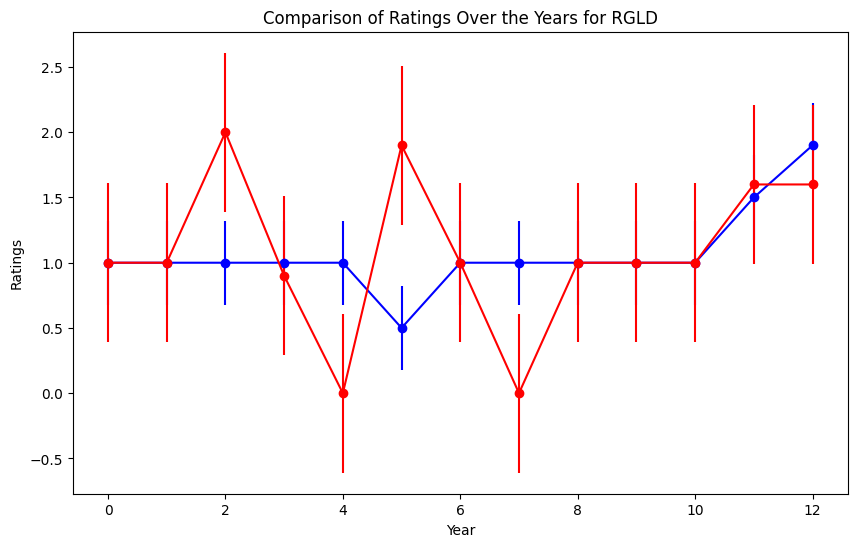

In [ ]:
for tick in df.ticker.unique():
    plt_df = df[df["ticker"]==tick]

    plt.figure(figsize=(10, 6))  # Adjust size of the plot if needed

    # plt.plot(plt_df['year'], plt_df['conf_rating'], label='Ratings', marker='o')
    # plt.plot(plt_df['year'], plt_df['conf_rating_strict'], label='Ratings (Strict)', marker='x')

    rating_ci = plt_df['conf_rating'].std()
    rating_strict_ci = plt_df['conf_rating_strict'].std()
    plt.errorbar(plt_df.index, plt_df['conf_rating'], yerr=rating_ci, fmt='-o', label='Ratings', color='blue')

    plt.errorbar(plt_df.index, plt_df['conf_rating_strict'], yerr=rating_strict_ci, fmt='-o', label='Rating Strict', color='red')


    # Adding labels and title
    plt.xlabel('Year')
    plt.ylabel('Ratings')
    plt.title(f'Comparison of Ratings Over the Years for {tick}')
    plt.xticks(plt_df['year'])  # Set x-axis ticks to be the years in your dataframe
    plt.legend()  # Show legend with labels

TypeError: can only concatenate str (not "float") to str

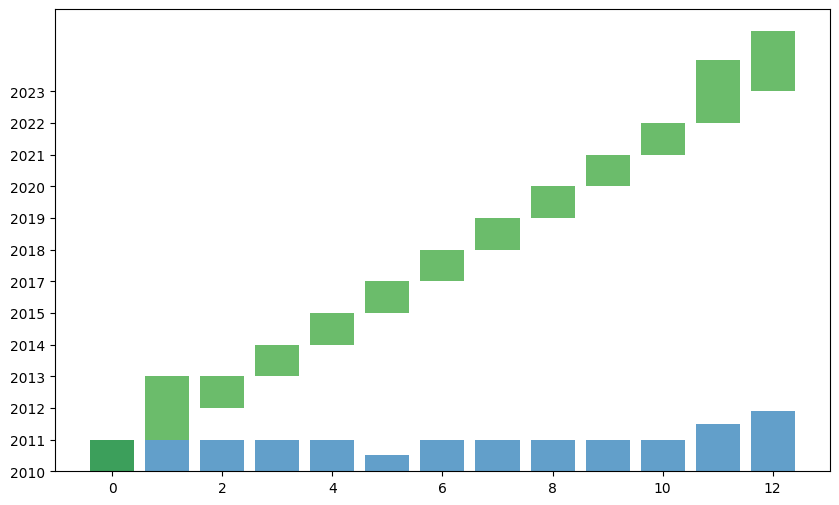

In [ ]:
for tick in df.ticker.unique():
    plt_df = df[df["ticker"]==tick].drop(columns=["ticker","Unnamed: 0"])

    plt.figure(figsize=(10, 6))  # Adjust size of the plot if needed

    # plt.plot(plt_df['year'], plt_df['conf_rating'], label='Ratings', marker='o')
    # plt.plot(plt_df['year'], plt_df['conf_rating_strict'], label='Ratings (Strict)', marker='x')

    categories = ['conf_rating', 'env_rating', 'inno_rating', 'people_rating']
    colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']

    for i, category in enumerate(categories):
        plt.bar(plt_df.index, plt_df[category], label=category.split('_')[0], color=colors[i], alpha=0.7, bottom=plt_df.iloc[:, :i].sum(axis=1))

    # Adding labels and title
    plt.xlabel('Year')
    plt.ylabel('Total Ratings')
    plt.title('Total Ratings by Category Over the Years')
    plt.xticks(plt_df.index)  # Set x-axis ticks to be the years
    plt.legend()  # Show legend with category names

    # Display the plot
    plt.grid(True)  # Add gridlines for better readability
    plt.show()

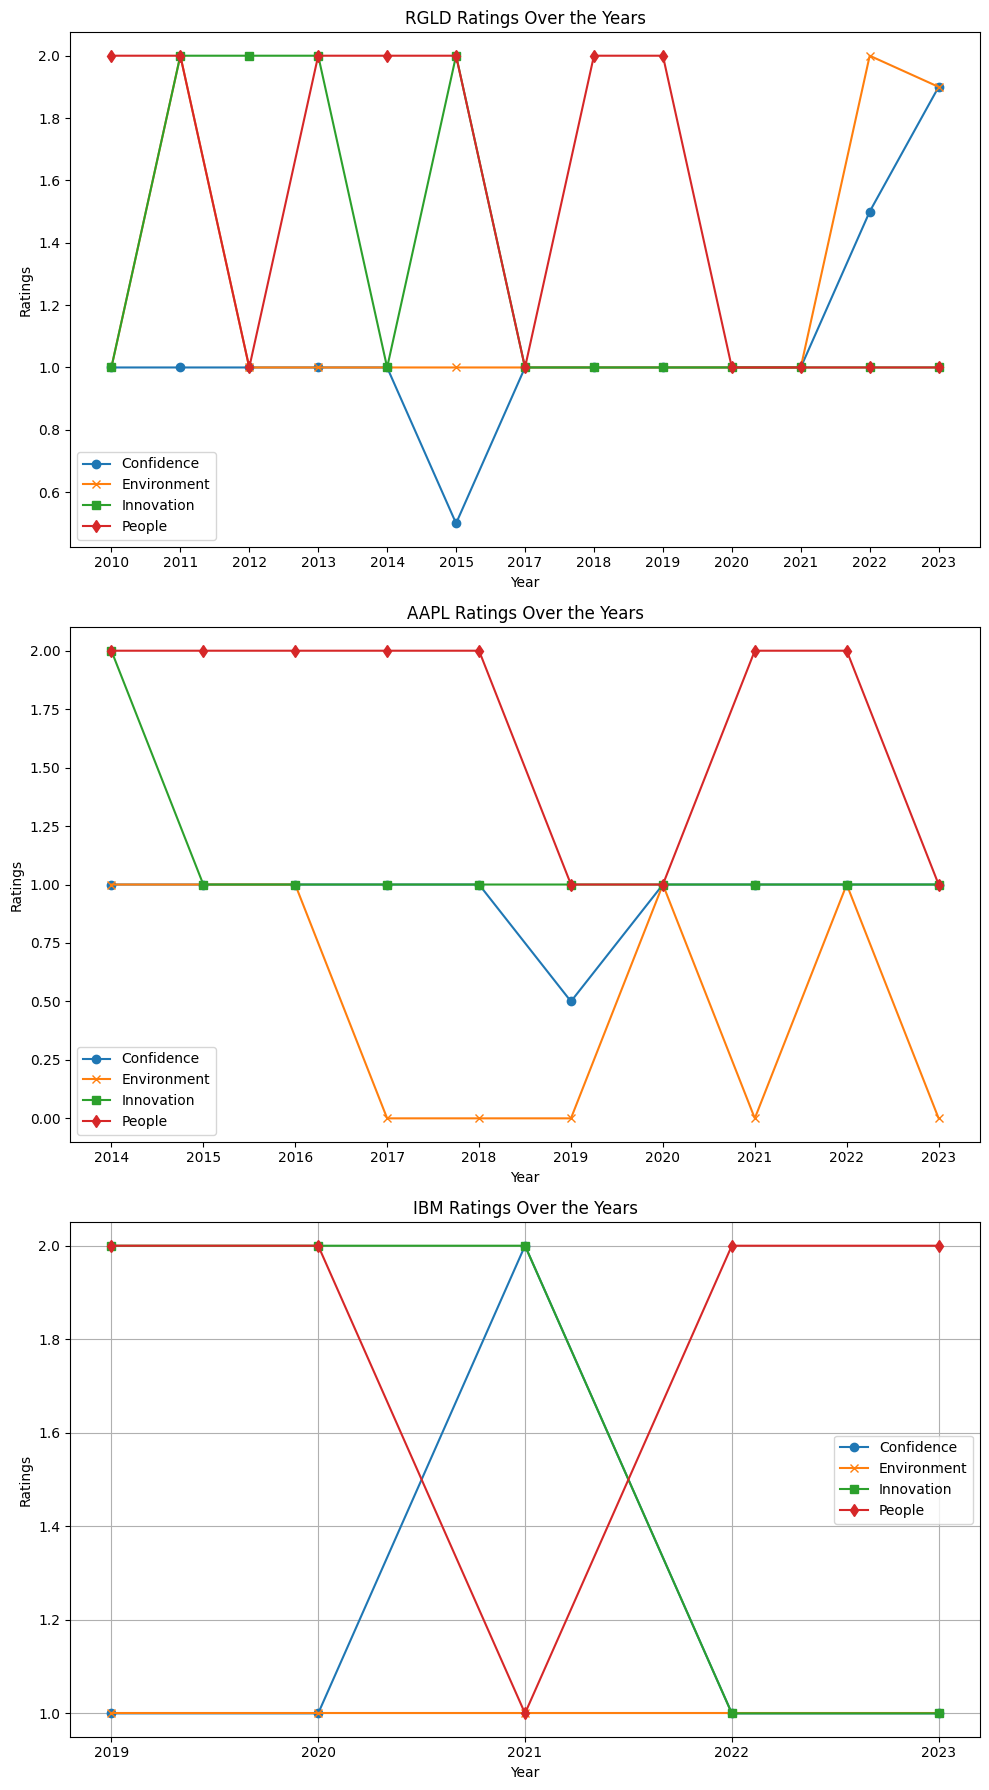

In [ ]:
unique_tickers = df['ticker'].unique()

# Plotting
num_plots = len(unique_tickers)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 6*num_plots))

for i, ticker in enumerate(unique_tickers):
    # Subset dataframe for the current ticker
    subset_df = df[df['ticker'] == ticker]

    # Plotting each category
    axes[i].plot(subset_df['year'], subset_df['conf_rating'], label='Confidence', marker='o')
    axes[i].plot(subset_df['year'], subset_df['env_rating'], label='Environment', marker='x')
    axes[i].plot(subset_df['year'], subset_df['inno_rating'], label='Innovation', marker='s')
    axes[i].plot(subset_df['year'], subset_df['people_rating'], label='People', marker='d')

    # Adding labels and title
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Ratings')
    axes[i].set_title(f'{ticker} Ratings Over the Years')
    axes[i].set_xticks(subset_df['year'])  # Set x-axis ticks to be the years in the subset
    axes[i].legend()  # Show legend with category names

# Adjust layout
plt.tight_layout()

# Display the plot
plt.grid(True)  # Add gridlines for better readability
plt.show()

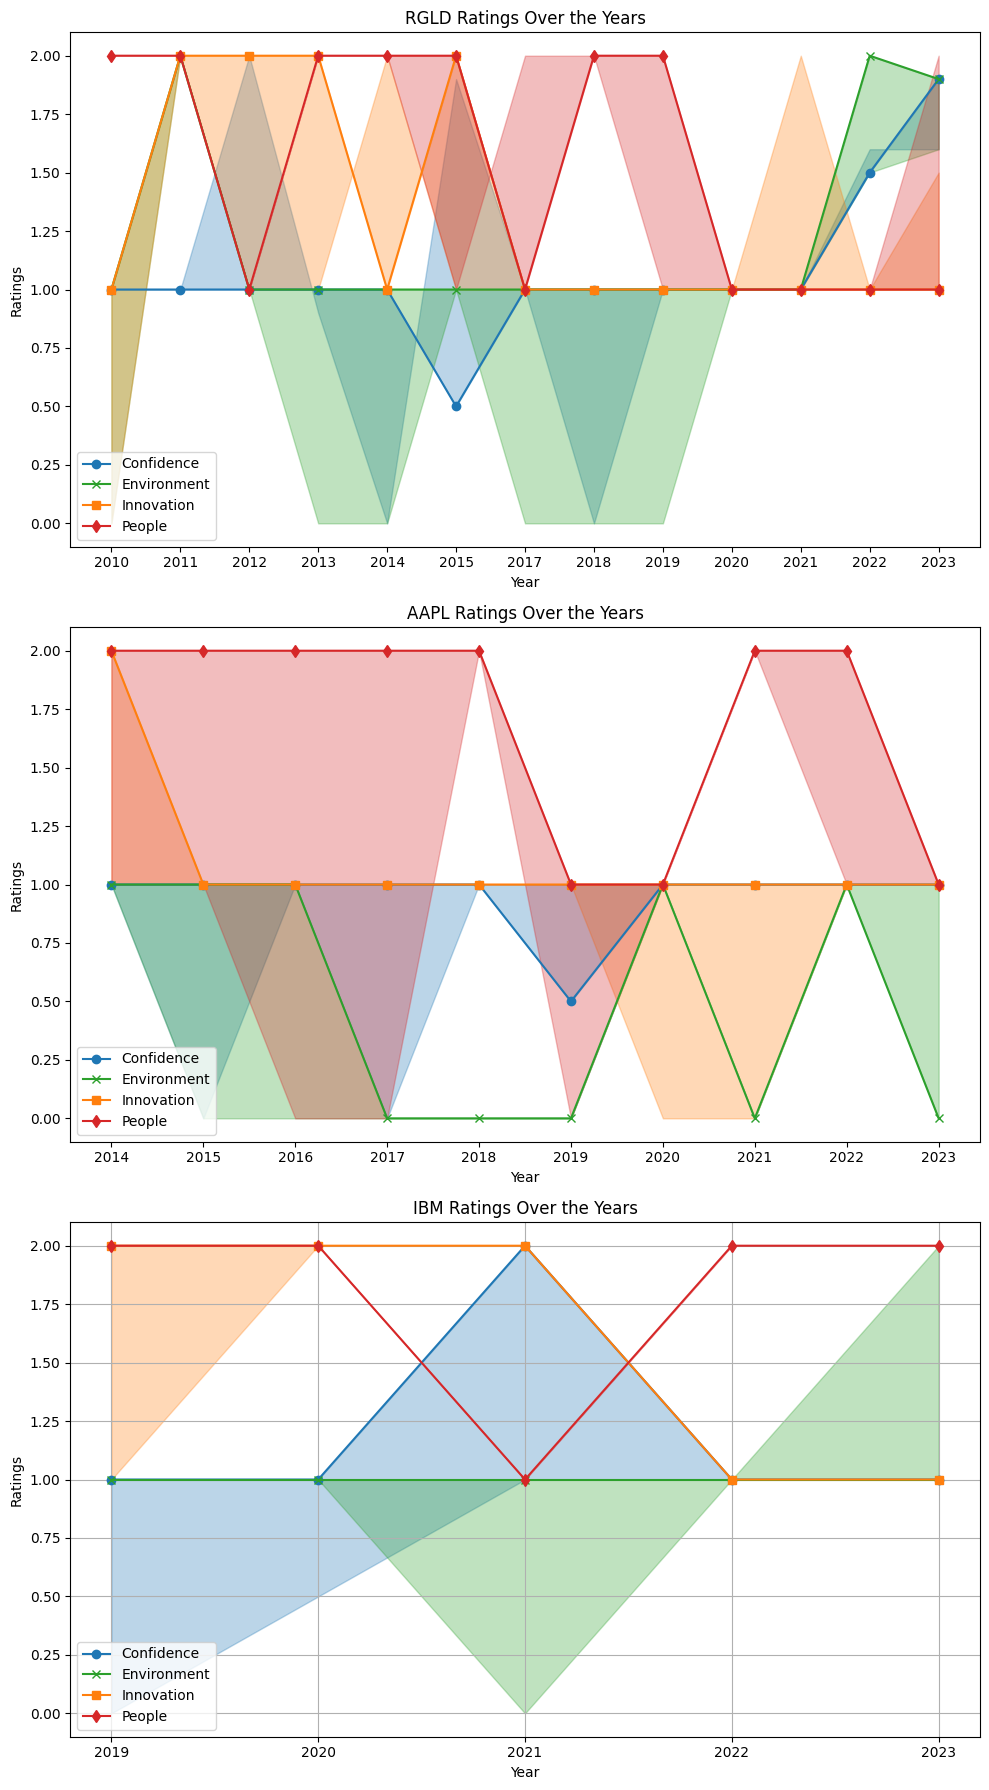

In [ ]:
unique_tickers = df['ticker'].unique()

# Plotting
num_plots = len(unique_tickers)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 6*num_plots))

for i, ticker in enumerate(unique_tickers):
    # Subset dataframe for the current ticker
    subset_df = df[df['ticker'] == ticker]

    # Plotting each category
    axes[i].plot(subset_df['year'], subset_df['conf_rating'], label='Confidence', marker='o', color='tab:blue')
    axes[i].fill_between(subset_df['year'], subset_df['conf_rating'], subset_df['conf_rating_strict'], alpha=0.3, color='tab:blue')

    axes[i].plot(subset_df['year'], subset_df['env_rating'], label='Environment', marker='x', color='tab:green')
    axes[i].fill_between(subset_df['year'], subset_df['env_rating'], subset_df['env_rating_strict'], alpha=0.3, color='tab:green')

    axes[i].plot(subset_df['year'], subset_df['inno_rating'], label='Innovation', marker='s', color='tab:orange')
    axes[i].fill_between(subset_df['year'], subset_df['inno_rating'], subset_df['inno_rating_strict'], alpha=0.3, color='tab:orange')

    axes[i].plot(subset_df['year'], subset_df['people_rating'], label='People', marker='d', color='tab:red')
    axes[i].fill_between(subset_df['year'], subset_df['people_rating'], subset_df['people_rating_strict'], alpha=0.3, color='tab:red')

    # Adding labels and title
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Ratings')
    axes[i].set_title(f'{ticker} Ratings Over the Years')
    axes[i].set_xticks(subset_df['year'])  # Set x-axis ticks to be the years in the subset
    axes[i].legend()  # Show legend with category names

# Adjust layout
plt.tight_layout()

# Display the plot
plt.grid(True)  # Add gridlines for better readability
plt.show()

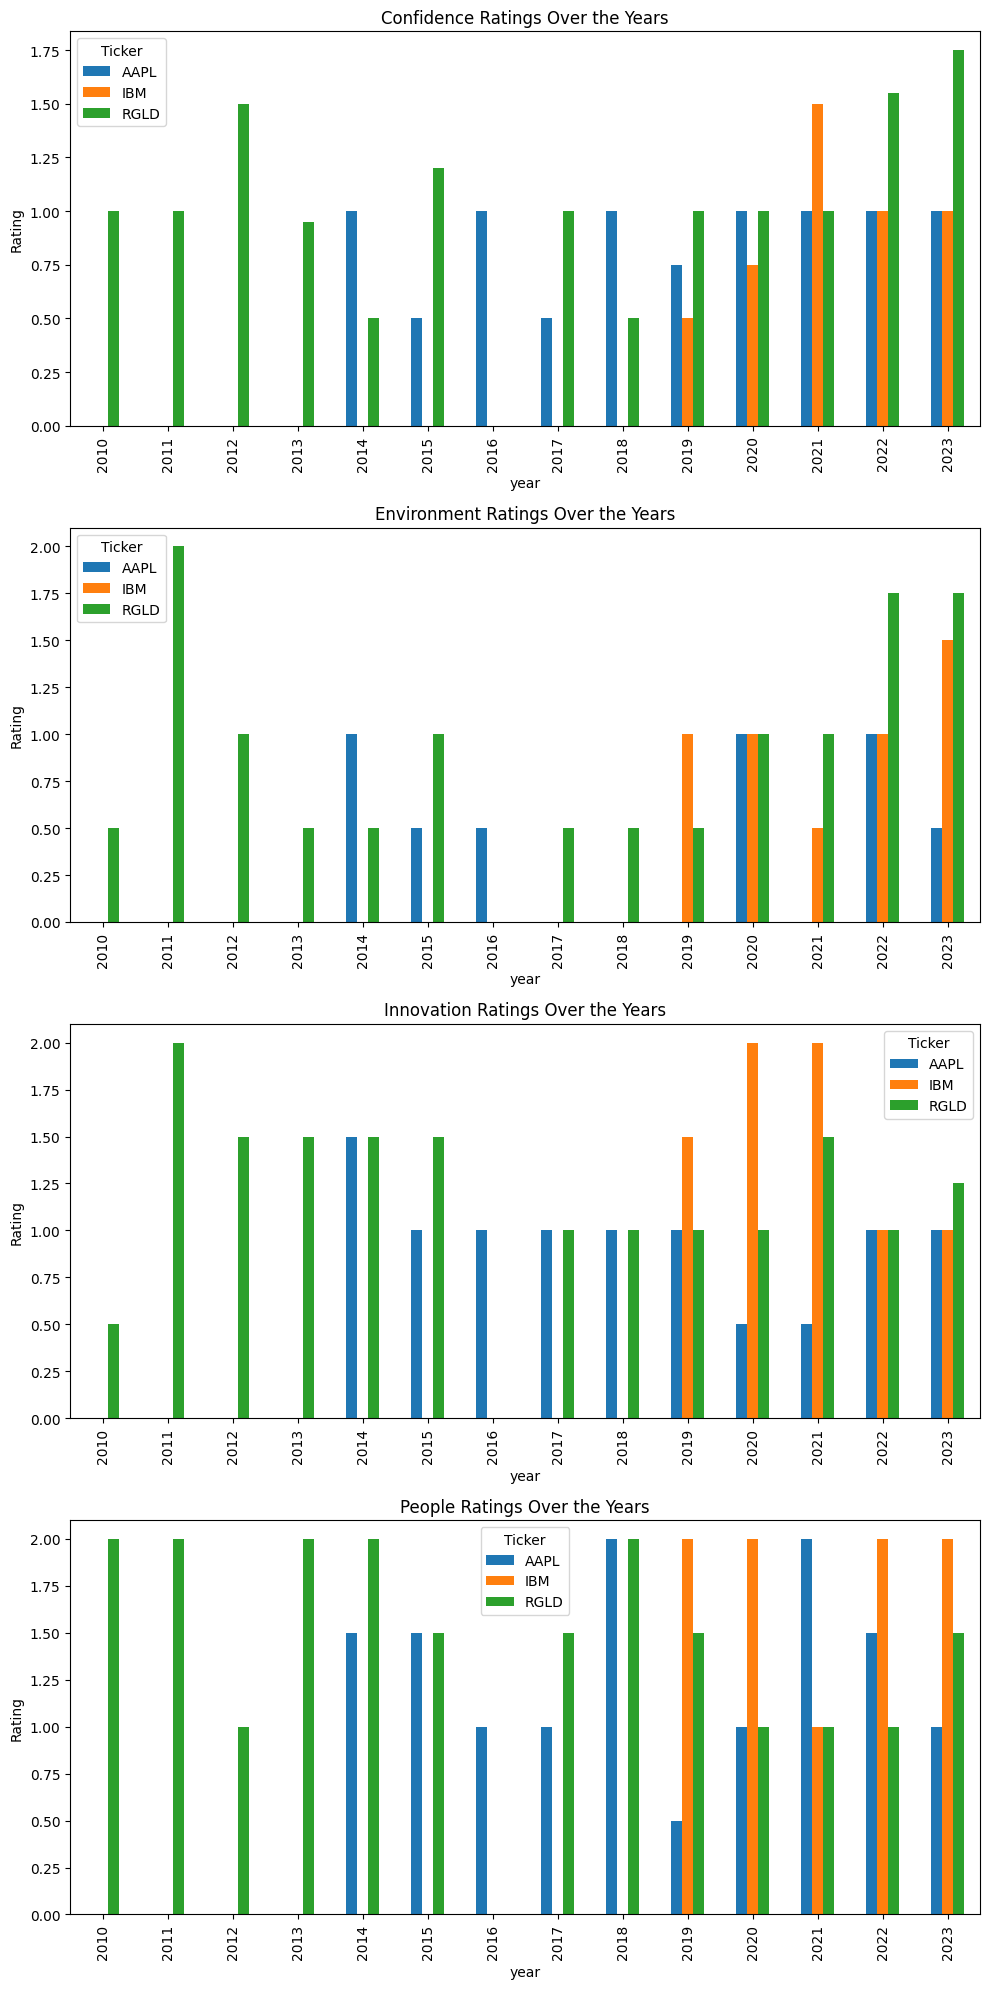

In [ ]:
conf_data = df[['ticker', 'year', 'conf_rating', 'conf_rating_strict']].set_index(['ticker', 'year']).stack().reset_index()
env_data = df[['ticker', 'year', 'env_rating', 'env_rating_strict']].set_index(['ticker', 'year']).stack().reset_index()
inno_data = df[['ticker', 'year', 'inno_rating', 'inno_rating_strict']].set_index(['ticker', 'year']).stack().reset_index()
people_data = df[['ticker', 'year', 'people_rating', 'people_rating_strict']].set_index(['ticker', 'year']).stack().reset_index()

# Plotting
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

# Confidence Ratings
conf_data.pivot_table(index='year', columns='ticker', values=0).plot(kind='bar', ax=axes[0])
axes[0].set_title('Confidence Ratings Over the Years')
axes[0].set_ylabel('Rating')
axes[0].legend(title='Ticker')

# Environment Ratings
env_data.pivot_table(index='year', columns='ticker', values=0).plot(kind='bar', ax=axes[1])
axes[1].set_title('Environment Ratings Over the Years')
axes[1].set_ylabel('Rating')
axes[1].legend(title='Ticker')

# Innovation Ratings
inno_data.pivot_table(index='year', columns='ticker', values=0).plot(kind='bar', ax=axes[2])
axes[2].set_title('Innovation Ratings Over the Years')
axes[2].set_ylabel('Rating')
axes[2].legend(title='Ticker')

# People Ratings
people_data.pivot_table(index='year', columns='ticker', values=0).plot(kind='bar', ax=axes[3])
axes[3].set_title('People Ratings Over the Years')
axes[3].set_ylabel('Rating')
axes[3].legend(title='Ticker')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

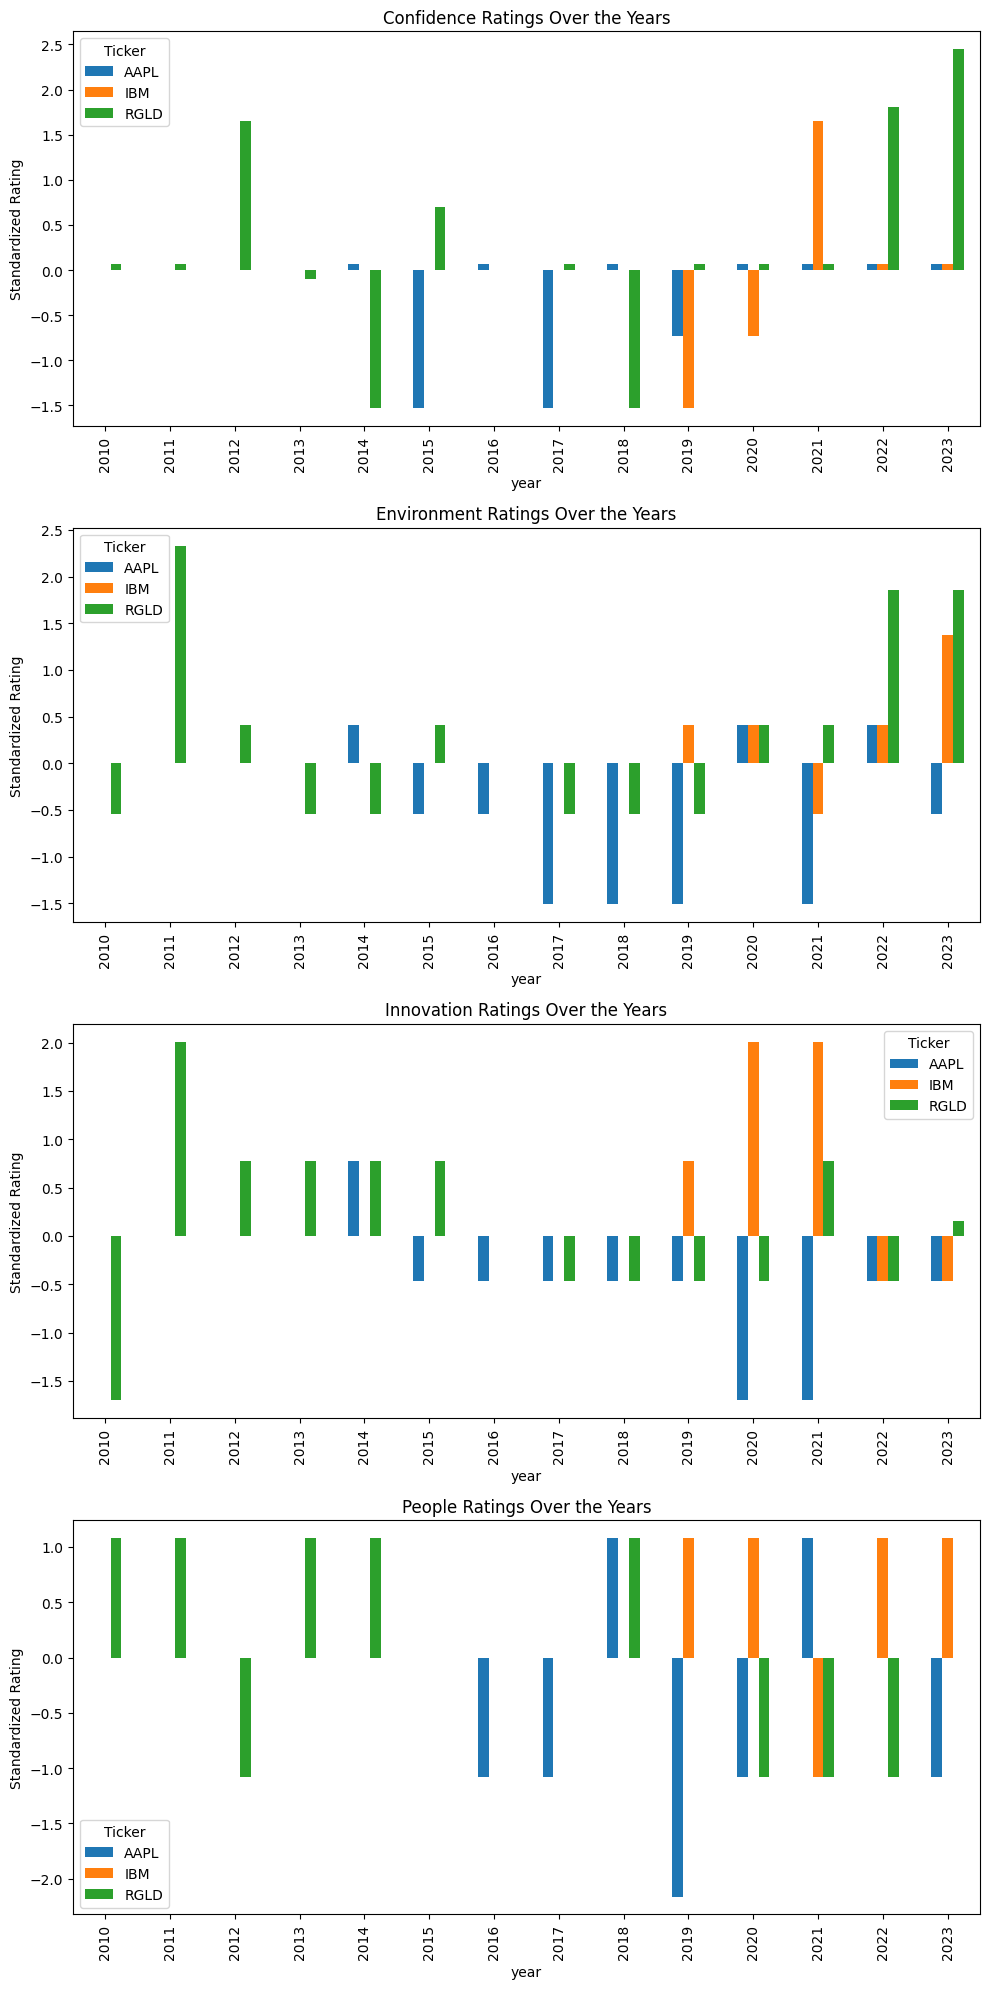

In [ ]:
# Calculate average rating for each category
df['conf_avg'] = (df['conf_rating'] + df['conf_rating_strict']) / 2
df['env_avg'] = (df['env_rating'] + df['env_rating_strict']) / 2
df['inno_avg'] = (df['inno_rating'] + df['inno_rating_strict']) / 2
df['people_avg'] = (df['people_rating'] + df['people_rating_strict']) / 2

# Standard scale the average ratings
scaler = StandardScaler()
df[['conf_avg', 'env_avg', 'inno_avg', 'people_avg']] = scaler.fit_transform(df[['conf_avg', 'env_avg', 'inno_avg', 'people_avg']])

# Grouping data by category
conf_data = df[['ticker', 'year', 'conf_avg']].set_index(['ticker', 'year']).stack().reset_index()
env_data = df[['ticker', 'year', 'env_avg']].set_index(['ticker', 'year']).stack().reset_index()
inno_data = df[['ticker', 'year', 'inno_avg']].set_index(['ticker', 'year']).stack().reset_index()
people_data = df[['ticker', 'year', 'people_avg']].set_index(['ticker', 'year']).stack().reset_index()

# Plotting
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

# Confidence Ratings
conf_data.pivot_table(index='year', columns='ticker', values=0).plot(kind='bar', ax=axes[0])
axes[0].set_title('Confidence Ratings Over the Years')
axes[0].set_ylabel('Standardized Rating')
axes[0].legend(title='Ticker')

# Environment Ratings
env_data.pivot_table(index='year', columns='ticker', values=0).plot(kind='bar', ax=axes[1])
axes[1].set_title('Environment Ratings Over the Years')
axes[1].set_ylabel('Standardized Rating')
axes[1].legend(title='Ticker')

# Innovation Ratings
inno_data.pivot_table(index='year', columns='ticker', values=0).plot(kind='bar', ax=axes[2])
axes[2].set_title('Innovation Ratings Over the Years')
axes[2].set_ylabel('Standardized Rating')
axes[2].legend(title='Ticker')

# People Ratings
people_data.pivot_table(index='year', columns='ticker', values=0).plot(kind='bar', ax=axes[3])
axes[3].set_title('People Ratings Over the Years')
axes[3].set_ylabel('Standardized Rating')
axes[3].legend(title='Ticker')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

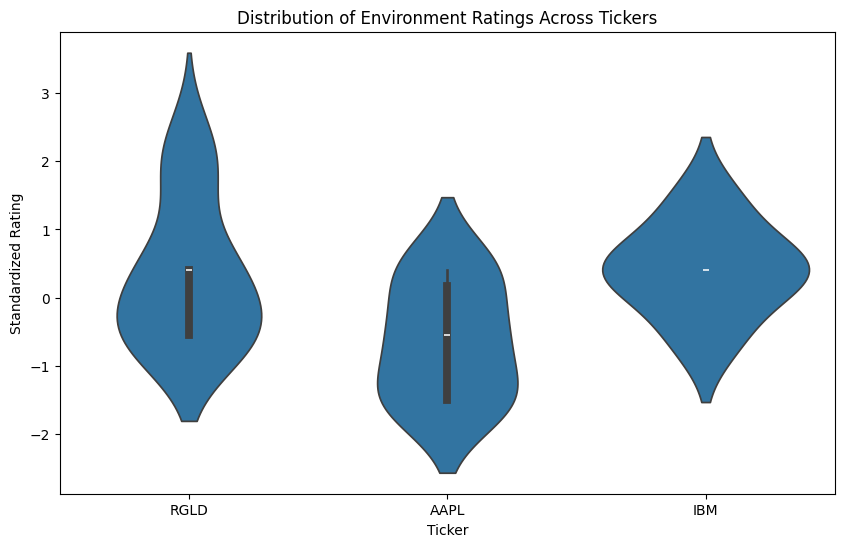

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='ticker', y='env_avg', data=df)
plt.title('Distribution of Environment Ratings Across Tickers')
plt.xlabel('Ticker')
plt.ylabel('Standardized Rating')
plt.show()

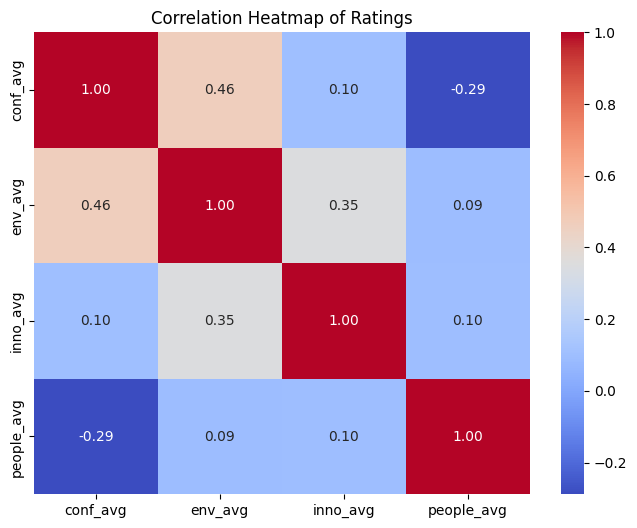

In [ ]:
# Compute correlation matrix
corr = df[['conf_avg', 'env_avg', 'inno_avg', 'people_avg']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Ratings')
plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'ticker', 'year', 'conf_rating', 'conf_rating_strict',
       'env_rating', 'env_rating_strict', 'inno_rating', 'inno_rating_strict',
       'people_rating', 'people_rating_strict', 'conf_avg', 'env_avg',
       'inno_avg', 'people_avg'],
      dtype='object')

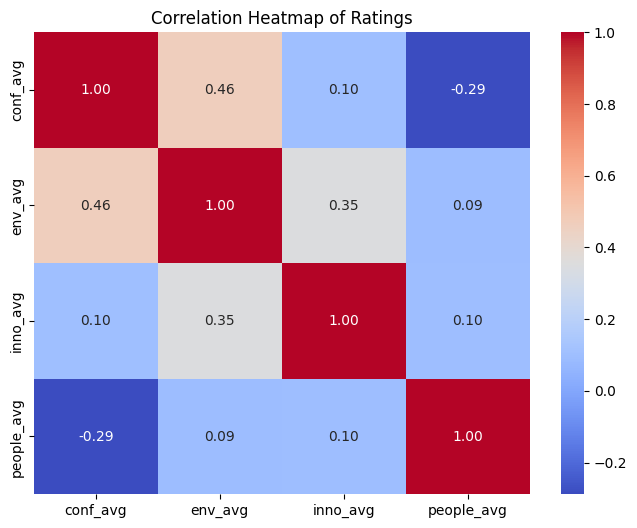

In [ ]:
# Compute correlation matrix
corr = df[['conf_avg', 'env_avg', 'inno_avg', 'people_avg']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Ratings')
plt.show()

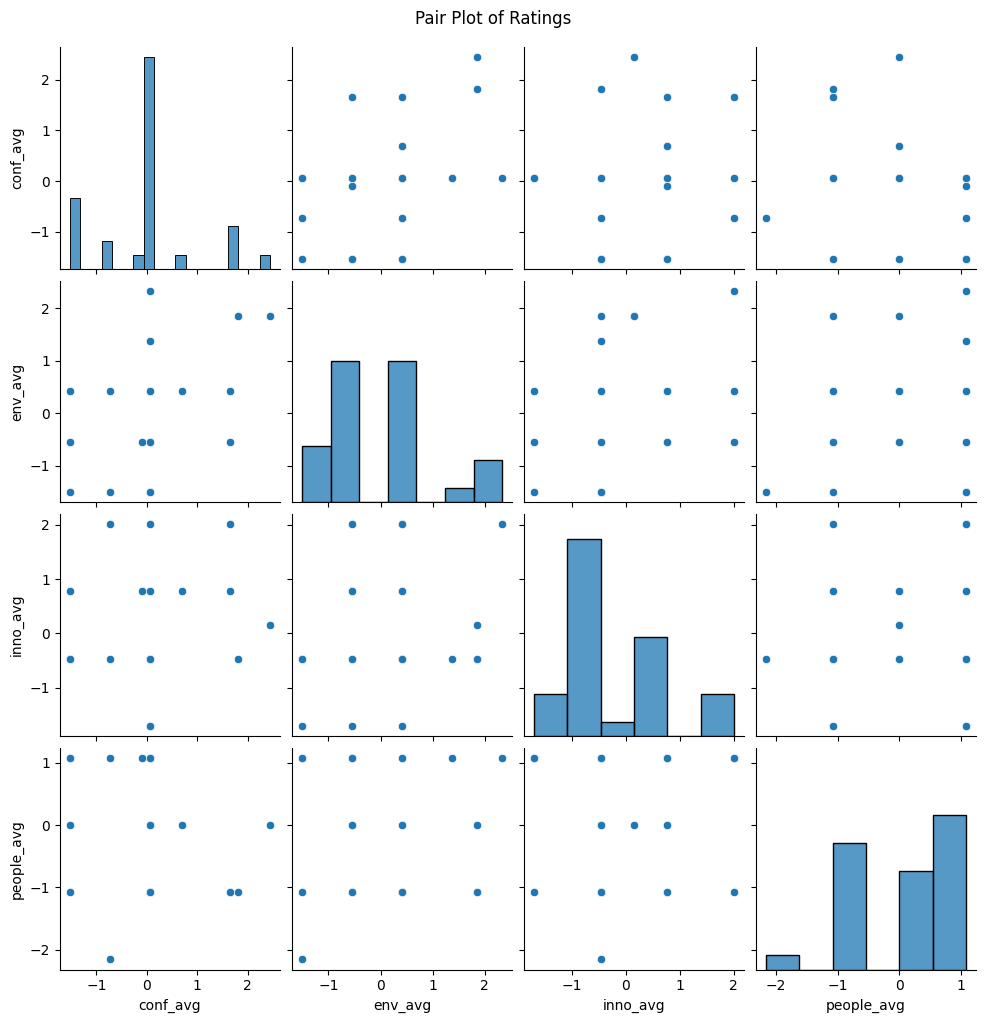

In [ ]:
sns.pairplot(df[['conf_avg', 'env_avg', 'inno_avg', 'people_avg']])
plt.suptitle('Pair Plot of Ratings', y=1.02)
plt.show()

/tmp/ipykernel_76112/1746622334.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='rating_type', y='rating', data=melted_df, palette='viridis')


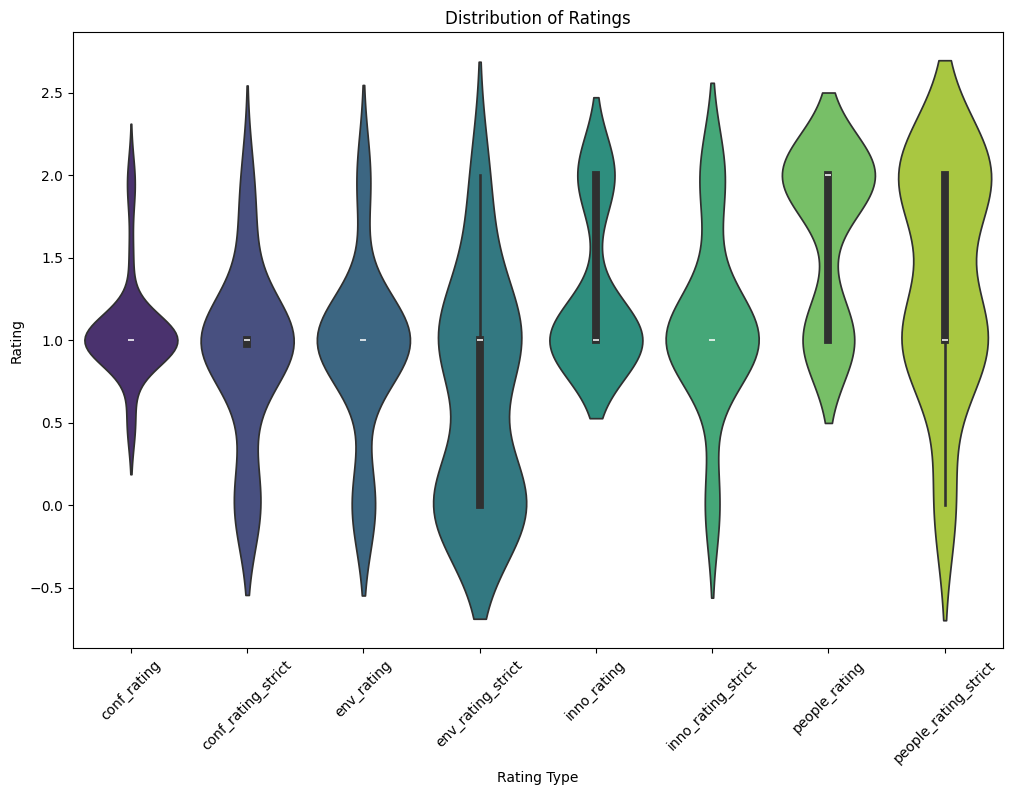

In [ ]:
# Melt the dataframe to have all ratings in one column
melted_df = df.melt(id_vars=['ticker', 'year'], value_vars=['conf_rating', 'conf_rating_strict', 'env_rating', 'env_rating_strict', 'inno_rating', 'inno_rating_strict', 'people_rating', 'people_rating_strict'], var_name='rating_type', value_name='rating')

# Violin plot for all ratings
plt.figure(figsize=(12, 8))
sns.violinplot(x='rating_type', y='rating', data=melted_df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

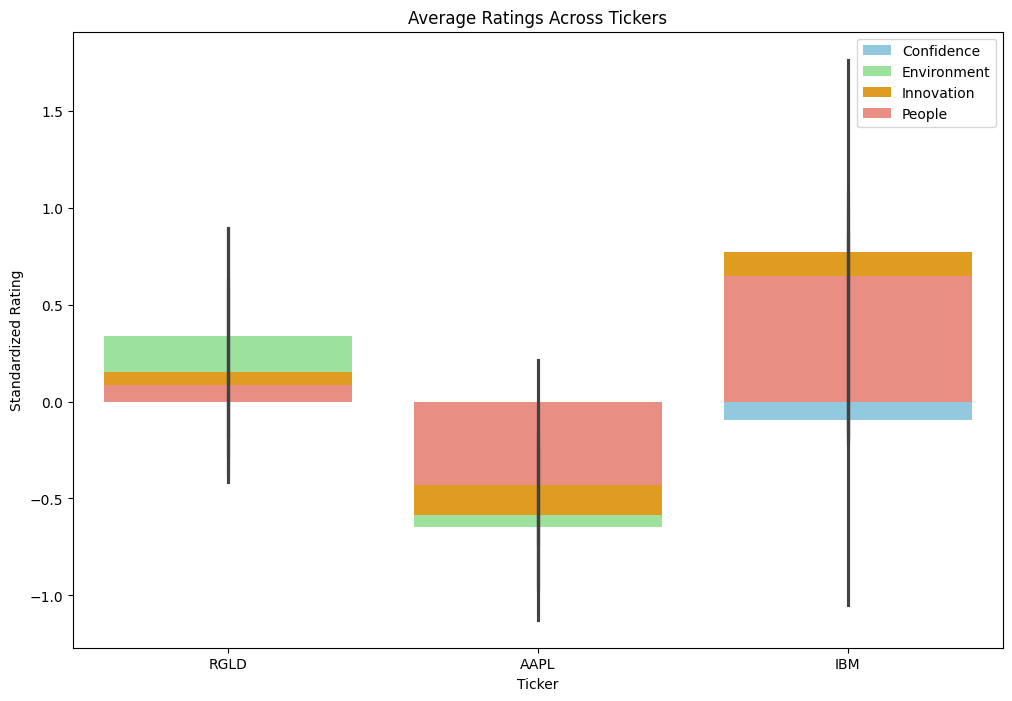

In [ ]:
# Clustered bar chart for each company
plt.figure(figsize=(12, 8))
sns.barplot(x='ticker', y='conf_avg', data=df, color='skyblue', label='Confidence')
sns.barplot(x='ticker', y='env_avg', data=df, color='lightgreen', label='Environment')
sns.barplot(x='ticker', y='inno_avg', data=df, color='orange', label='Innovation')
sns.barplot(x='ticker', y='people_avg', data=df, color='salmon', label='People')
plt.title('Average Ratings Across Tickers')
plt.xlabel('Ticker')
plt.ylabel('Standardized Rating')
plt.legend()
plt.show()

In [ ]:
df

,Unnamed: 0,ticker,year,conf_rating,conf_rating_strict,env_rating,env_rating_strict,inno_rating,inno_rating_strict,people_rating,people_rating_strict,conf_avg,env_avg,inno_avg,people_avg
0,0,RGLD,2010,1.0,1.0,1.0,0.0,1.0,0.0,2.0,2.0,0.062433,-0.548795,-1.700231,1.080123
1,1,RGLD,2011,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.062433,2.332381,2.009364,1.080123
2,2,RGLD,2012,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.651624,0.411597,0.772832,-1.080123
3,3,RGLD,2013,1.0,0.9,1.0,0.0,2.0,1.0,2.0,2.0,-0.096487,-0.548795,0.772832,1.080123
4,4,RGLD,2014,1.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,-1.526759,-0.548795,0.772832,1.080123
5,5,RGLD,2015,0.5,1.9,1.0,1.0,2.0,1.0,2.0,1.0,0.698109,0.411597,0.772832,0.000000
6,6,RGLD,2017,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,0.062433,-0.548795,-0.463699,0.000000
7,7,RGLD,2018,1.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0,-1.526759,-0.548795,-0.463699,1.080123
8,8,RGLD,2019,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,0.062433,-0.548795,-0.463699,0.000000
9,9,RGLD,2020,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.062433,0.411597,-0.463699,-1.080123


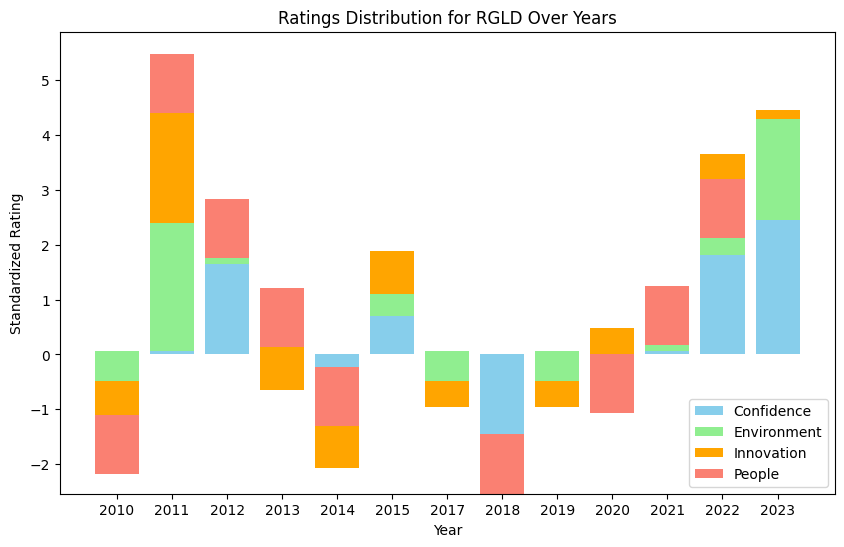

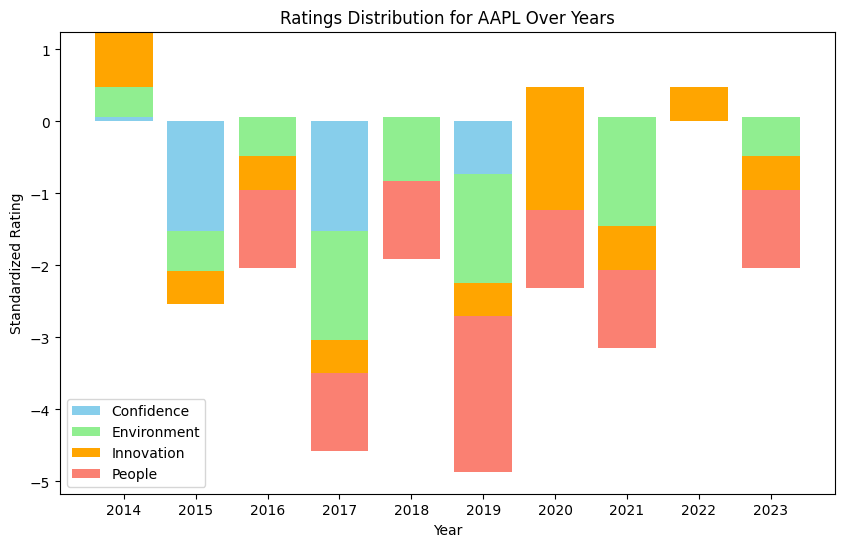

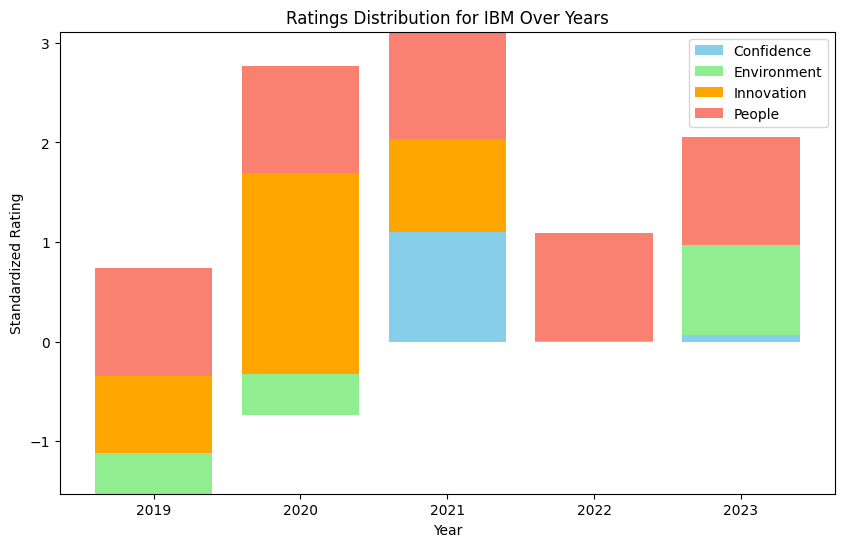

In [ ]:
# Grouping data by ticker and year
grouped_df = df.groupby(['ticker', 'year']).mean().reset_index()

# Plotting stacked bar chart for each ticker
for ticker in df['ticker'].unique():
    ticker_data = grouped_df[grouped_df['ticker'] == ticker]
    plt.figure(figsize=(10, 6))
    plt.bar(ticker_data['year'], ticker_data['conf_avg'], label='Confidence', color='skyblue')
    plt.bar(ticker_data['year'], ticker_data['env_avg'], bottom=ticker_data['conf_avg'], label='Environment', color='lightgreen')
    plt.bar(ticker_data['year'], ticker_data['inno_avg'], bottom=ticker_data['conf_avg'] + ticker_data['env_avg'], label='Innovation', color='orange')
    plt.bar(ticker_data['year'], ticker_data['people_avg'], bottom=ticker_data['conf_avg'] + ticker_data['env_avg'] + ticker_data['inno_avg'], label='People', color='salmon')
    plt.title(f'Ratings Distribution for {ticker} Over Years')
    plt.xlabel('Year')
    plt.ylabel('Standardized Rating')
    plt.legend()
    plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'ticker', 'year', 'conf_rating', 'conf_rating_strict',
       'env_rating', 'env_rating_strict', 'inno_rating', 'inno_rating_strict',
       'people_rating', 'people_rating_strict', 'conf_avg', 'env_avg',
       'inno_avg', 'people_avg'],
      dtype='object')

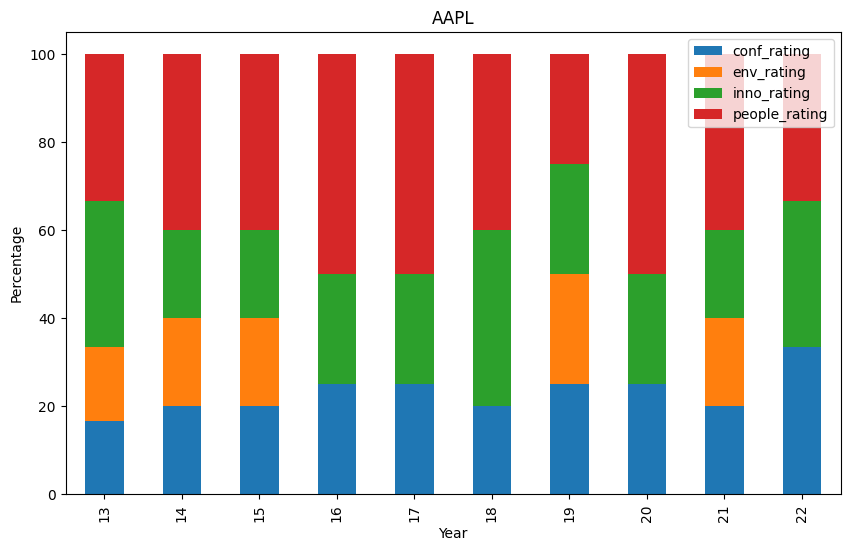

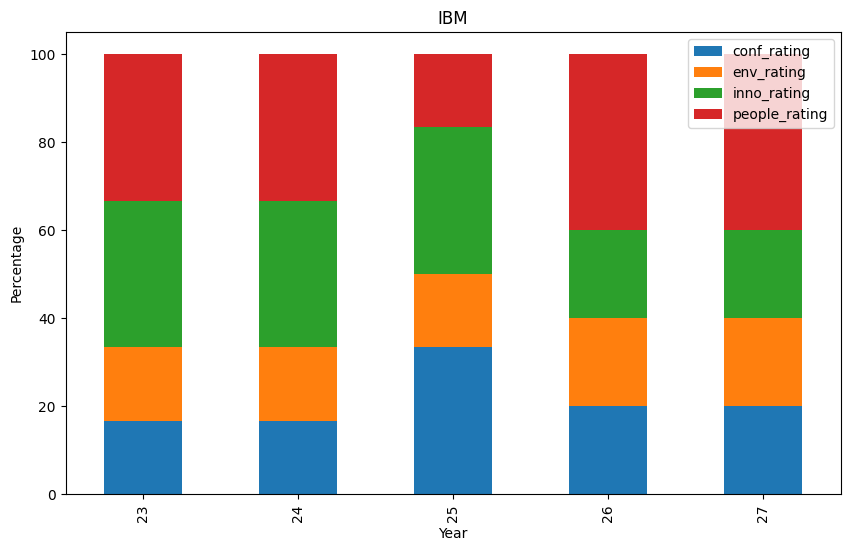

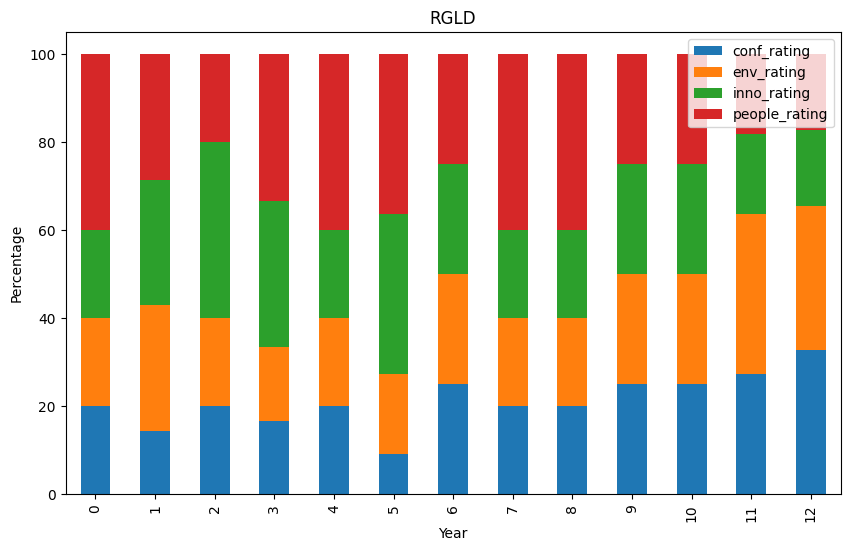

In [ ]:
grouped = df.groupby('ticker')

# Initialize a list to store the data for plotting
plots = []

# Iterate over groups
for ticker, group in grouped:
    # Calculate total sum of ratings for each ticker
    total_sum = group[['conf_rating', 'env_rating', 'inno_rating', 'people_rating']].sum(axis=1)

    # Calculate percentages
    percentages = group[['conf_rating', 'env_rating', 'inno_rating', 'people_rating']].div(total_sum, axis=0) * 100

    # Plot stacked bar chart
    plot = percentages.plot(kind='bar', stacked=True, figsize=(10, 6), title=ticker)

    # Set labels
    plot.set_xlabel('Year')
    plot.set_ylabel('Percentage')

    # Store plot for later use
    plots.append(plot)

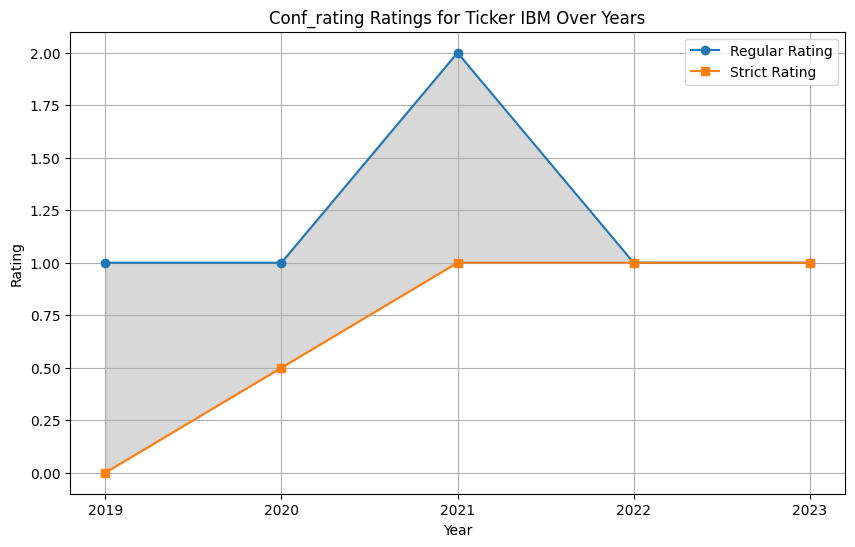

In [ ]:
ticker = 'IBM'
rating_type = 'conf_rating'  # Choose the rating type (e.g., 'conf_rating', 'env_rating', 'inno_rating', 'people_rating')

# Filtering data
ticker_data = df[df['ticker'] == ticker]

# Plotting
plt.figure(figsize=(10, 6))

# Plotting regular rating
plt.plot(ticker_data['year'], ticker_data[rating_type], marker='o', label='Regular Rating', color='tab:blue')

# Plotting strict rating
plt.plot(ticker_data['year'], ticker_data[f'{rating_type}_strict'], marker='s', label='Strict Rating', color='tab:orange')

# Shading the gap between regular and strict rating
plt.fill_between(ticker_data['year'], ticker_data[rating_type], ticker_data[f'{rating_type}_strict'], color='tab:gray', alpha=0.3)

# Adding labels and title
plt.title(f'{rating_type.capitalize()} Ratings for Ticker {ticker} Over Years')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
def get_ratings_plot(ticker,rating_type):
    # Filtering data
    ticker_data = df[df['ticker'] == ticker]

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plotting regular rating
    plt.plot(ticker_data['year'], ticker_data[rating_type], marker='o', label='Regular Rating', color='tab:blue')

    # Plotting strict rating
    plt.plot(ticker_data['year'], ticker_data[f'{rating_type}_strict'], marker='s', label='Strict Rating', color='tab:orange')

    # Shading the gap between regular and strict rating
    plt.fill_between(ticker_data['year'], ticker_data[rating_type], ticker_data[f'{rating_type}_strict'], color='tab:gray', alpha=0.3)

    # Adding labels and title
    plt.title(f'{rating_type.capitalize()} Ratings for Ticker {ticker} Over Years')
    plt.xlabel('Year')
    plt.ylabel('Rating')
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

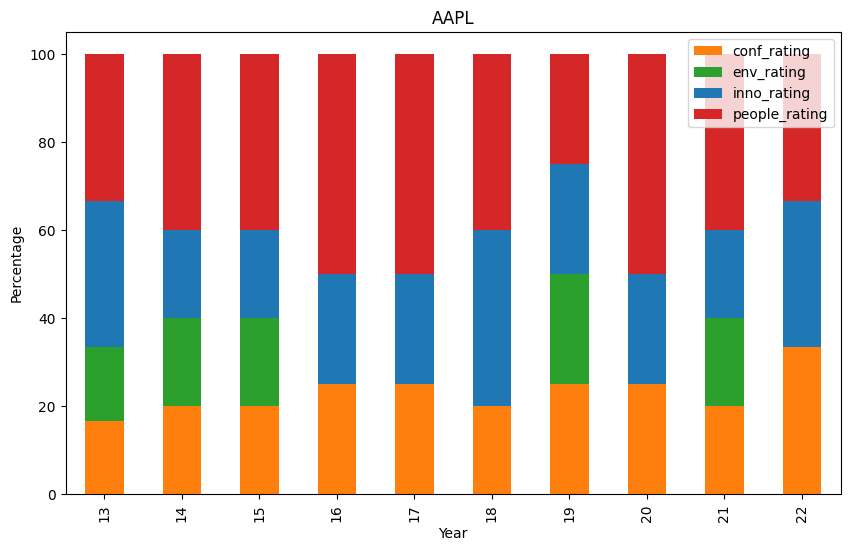

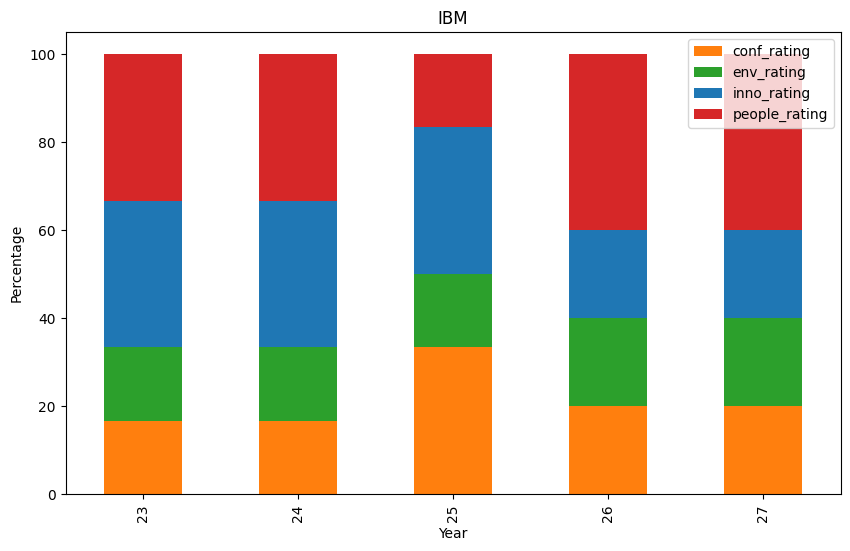

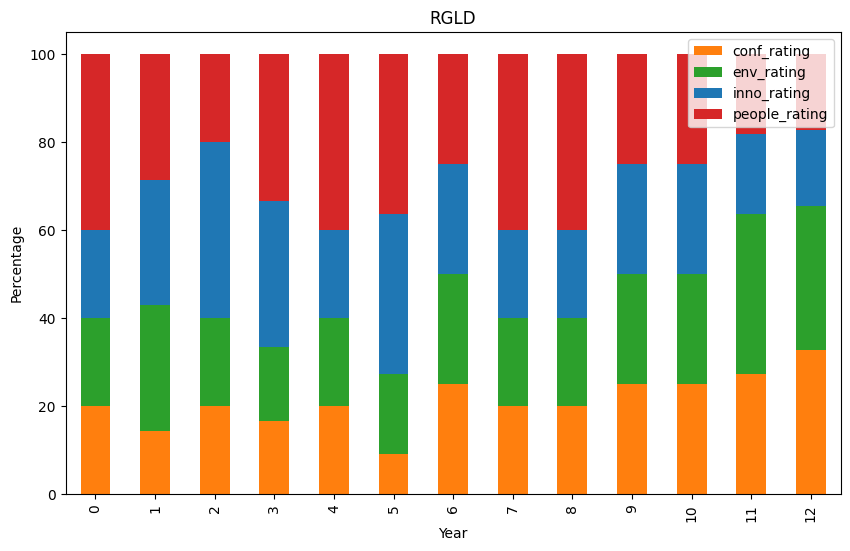

In [ ]:
colors = {
    'conf_rating': '#ff7f0e',    # orange
    'env_rating': '#2ca02c',   # green
    'inno_rating': '#1f77b4',  # blue
    'people_rating': '#d62728'  # red
}

# Group data by 'ticker'
grouped = df.groupby('ticker')

# Initialize a list to store the data for plotting
plots = []

# Iterate over groups
for ticker, group in grouped:
    # Calculate total sum of ratings for each ticker
    total_sum = group[['conf_rating', 'env_rating', 'inno_rating', 'people_rating']].sum(axis=1)

    # Calculate percentages
    percentages = group[['conf_rating', 'env_rating', 'inno_rating', 'people_rating']].div(total_sum, axis=0) * 100

    # Plot stacked bar chart with custom colors
    plot = percentages.plot(kind='bar', stacked=True, figsize=(10, 6), title=ticker, color=[colors[col] for col in percentages.columns])

    # Set labels
    plot.set_xlabel('Year')
    plot.set_ylabel('Percentage')

    # Store plot for later use
    plots.append(plot)

# Show plots
plt.show()

In [ ]:
#now it is time for comparative analysis.

In [ ]:
def get_comparison(excerpt_1, excerpt_2):
    while True:
        try:
            response = co.chat(
                message=f"""
                You are an AI grader that given an output and a criterion, grades the completion based on
                the prompt and criterion. Below "Excerpt 1" and "Excerpt 2", you must compare both excerpts and output which excerpt is better
                based on the Criterion.

                ## Excerpt 1
                {excerpt_1}

                ## Excerpt 2
                {excerpt_2}

                ## Criterion
                The Excerpt which is more technically and operationally feasible, contains more concrete planning for future growth, has robust
                clear and transparent financials and logic is the better Excerpt.
                [Answer only with either "Excerpt 1" or "Excerpt 2" based on which Excerpt is better. Do not use quotation marks.]
                """,
                prompt_truncation="AUTO"
            )
            print(response)
            return response.text
        except Exception as e:
            print(f"An error occurred: {e}")
            print("Waiting 1 minute before retrying...")
            time.sleep(60)  # Sleep for 1 minute before retrying

In [ ]:
test = pd.read_csv("IBM/2022.csv")

In [ ]:
test.head()

,section,element_type,text
0,BUSINESS,NarrativeText,International Business Machines Corporation (I...
1,BUSINESS,NarrativeText,The following information is included in IBM’s...
2,BUSINESS,NarrativeText,IBM Strategy—pages 11 to 13.
3,BUSINESS,NarrativeText,Business Segments and Capabilities—pages 14 to...
4,BUSINESS,NarrativeText,Human Capital—pages 15 to 16.


In [ ]:
comparision_df = pd.DataFrame(columns=[
    "ticker_1","ticker_2","year","section","comparision"
])

In [ ]:
comparision_df

,ticker_1,ticker_2,year,section,comparision
0,IBM,AAPL,2018,ACCOUNTING_FEES,Excerpt 2
1,IBM,AAPL,2018,BUSINESS,Excerpt 2
2,IBM,AAPL,2018,COMPENSATION,Excerpt 2
3,IBM,AAPL,2018,CONTROLS_AND_PROCEDURES,Excerpt 2
4,IBM,AAPL,2018,FINANCIAL_STATEMENTS,Excerpt 2
5,IBM,AAPL,2018,LEGAL_PROCEEDINGS,Excerpt 2
6,IBM,AAPL,2018,MANAGEMENT,Excerpt 1
7,IBM,AAPL,2018,MANAGEMENT_DISCUSSION,Excerpt 2
8,IBM,AAPL,2018,MARKET_RISK_DISCLOSURES,Excerpt 2
9,IBM,AAPL,2018,PROPERTIES,Excerpt 2


In [ ]:
years_list = ["2018","2019","2020","2021","2022","2023"]
ticker_list = ["IBM","AAPL","RGLD"]

ticker_dict = {
    "IBM":"AAPL",
    "AAPL":"RGLD",
    "RGLD":"IBM"
}

counter=0

for ticker_1 in ticker_list:
    ticker_2 = ticker_dict[ticker_1]

    for year in years_list:
        df_1 = pd.read_csv(f"{ticker_1}/{year}.csv")
        df_2 = pd.read_csv(f"{ticker_2}/{year}.csv")

        grouped_df_1 = df_1[["section","text"]].groupby('section')['text'].agg(lambda x: ' '.join(x)).reset_index()
        grouped_df_2 = df_2[["section","text"]].groupby('section')['text'].agg(lambda x: ' '.join(x)).reset_index()

        for sec in grouped_df_1.section.unique():
            excerpt_1 = grouped_df_1[grouped_df_1["section"]==sec]["text"]
            excerpt_2 = grouped_df_2[grouped_df_2["section"]==sec]["text"]
            #.to_string(index=False)
            if excerpt_2.empty:
                continue

            # print("EXCERPT 1")
            # print(excerpt_1.to_string(index=False))
            # print(ticker_1)

            # print("EXCERPT 2")
            # print(excerpt_2.to_string(index=False))

            # print(ticker_2)
            # print(year)

            comparision = get_comparision(excerpt_1=excerpt_1.to_string(index=False), excerpt_2=excerpt_2.to_string(index=False))
            counter+=1
            new_row = {
                "ticker_1":ticker_1,
                "ticker_2":ticker_2,
                "year":year,
                "section":sec,
                "comparision":comparision
            }
            comparision_df = pd.concat([comparision_df, pd.DataFrame([new_row])], ignore_index=True)



text='Excerpt 2' generation_id='cf78a347-4cf4-4e0b-b794-53fb9376293a' citations=None documents=None is_search_required=None search_queries=None search_results=None finish_reason='COMPLETE' tool_calls=None chat_history=[ChatMessage(role='USER', message='\n    You are an AI grader that given an output and a criterion, grades the completion based on\n    the prompt and criterion. Below "Excerpt 1" and "Excerpt 2", you must compare both excerpts and output which excerpt is better\n    based on the Criterion.\n \n    ## Excerpt 1\n    Refer to the information under the captions "Re...\n\n    ## Excerpt 2\n    The information required by this Item is set fo...\n\n    ## Criterion \n    The Excerpt which is more technically and operationally feasable, contains more concrete planning for future growth, has robust\n    clear and transparent financials and logic is the better Excerpt.\n    [Answer only with either "Excerpt 1" or "Excerpt 2" based on which Excerpt is better. Do not use quotation 

TooManyRequestsError: status_code: 429, body: {'message': "You are using a Trial key, which is limited to 20 API calls / minute. You can continue to use the Trial key for free or upgrade to a Production key with higher rate limits at 'https://dashboard.cohere.com/api-keys'. Contact us on 'https://discord.gg/XW44jPfYJu' or email us at support@cohere.com with any questions"}